<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Crypto_CorrelationMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 288 kB 11.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 103 kB 39.2 MB/s 
     |████████████████████████████████| 271 kB 67.5 MB/s 
     |████████████████████████████████| 160 kB 61.0 MB/s 
     |████████████████████████████████| 144 kB 62.1 MB/s 


In [ ]:
import pandas as pd
from binance.client import Client
import numpy as np
import datetime as dt

In [ ]:
client = Client()

In [ ]:
info = client.get_exchange_info()

In [ ]:
symbols = [x['symbol'] for x in info['symbols']]

In [ ]:
symbols

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BCCBTC',
 'GASBTC',
 'BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'HSRBTC',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'MCOBTC',
 'WTCBTC',
 'WTCETH',
 'LRCBTC',
 'LRCETH',
 'QTUMBTC',
 'YOYOBTC',
 'OMGBTC',
 'OMGETH',
 'ZRXBTC',
 'ZRXETH',
 'STRATBTC',
 'STRATETH',
 'SNGLSBTC',
 'SNGLSETH',
 'BQXBTC',
 'BQXETH',
 'KNCBTC',
 'KNCETH',
 'FUNBTC',
 'FUNETH',
 'SNMBTC',
 'SNMETH',
 'NEOETH',
 'IOTABTC',
 'IOTAETH',
 'LINKBTC',
 'LINKETH',
 'XVGBTC',
 'XVGETH',
 'SALTBTC',
 'SALTETH',
 'MDABTC',
 'MDAETH',
 'MTLBTC',
 'MTLETH',
 'SUBBTC',
 'SUBETH',
 'EOSBTC',
 'SNTBTC',
 'ETCETH',
 'ETCBTC',
 'MTHBTC',
 'MTHETH',
 'ENGBTC',
 'ENGETH',
 'DNTBTC',
 'ZECBTC',
 'ZECETH',
 'BNTBTC',
 'ASTBTC',
 'ASTETH',
 'DASHBTC',
 'DASHETH',
 'OAXBTC',
 'ICNBTC',
 'BTGBTC',
 'BTGETH',
 'EVXBTC',
 'EVXETH',
 'REQBTC',
 'REQETH',
 'VIBBTC',
 'VIBETH',
 'HSRETH',
 'TRXBTC',
 'TRXETH',
 'POWRBTC',
 'POWRETH',
 'ARKBTC',
 'ARKETH'

In [ ]:
relevant = [symbol for symbol in symbols if symbol.endswith('USDT')]

In [ ]:
def getdailydata(symbol):
  frame = pd.DataFrame(client.get_historical_klines_generator(symbol, '1d', '365 Days ago UTC'))

  if len(frame) > 0:
    frame = frame.iloc[:,:5]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame


In [ ]:
getdailydata('BTCUSDT')

,Open,High,Low,Close
Time,,,,
2021-01-22,30851.99,33826.53,28850.00,32945.17
2021-01-23,32950.00,33456.00,31390.16,32078.00
2021-01-24,32078.00,33071.00,30900.00,32259.90
2021-01-25,32259.45,34875.00,31910.00,32254.20
2021-01-26,32254.19,32921.88,30837.37,32467.77
...,...,...,...,...
2022-01-17,43071.66,43176.18,41540.42,42201.62
2022-01-18,42201.63,42691.00,41250.00,42352.12
2022-01-19,42352.12,42559.13,41138.56,41660.01


In [ ]:
relevant

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'USDCUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'BTTUSDT',
 'USDSUSDT',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'IOSTUSDT',
 'CELRUSDT',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 'ENJUSDT',
 'MITHUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'TFUELUSDT',
 'ONEUSDT',
 'FTMUSDT',
 'ALGOUSDT',
 'USDSBUSDT',
 'GTOUSDT',
 'ERDUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'WINUSDT',
 'COSUSDT',
 'NPXSUSDT',
 'COCOSUSDT',
 'MTLUSDT',
 'TOMOUSDT',
 'PERLUSDT',
 'DENTUSDT',
 'MFTUSDT',
 'KEYUSDT',
 'STORMUSDT',
 'DOCKUSDT',
 'WANUSDT',
 'FUNUSDT',
 'CVCUSDT',
 'CHZUSDT',
 'BANDUSDT',
 'BUSDUSDT',
 'BEAMUSDT',
 'XTZUSDT',
 'RENUSDT',
 'RVNUSDT',
 'HCUSDT',
 'HBARUSD

In [ ]:
dfs = []

for coin in relevant:
  dfs.append(getdailydata(coin))

In [ ]:
pd.concat(dict(zip(relevant, dfs)), axis=1)

BTCUSDT                                ... API3USDT                    
                Open      High       Low     Close  ...     Open   High   Low  Close
Time                                                ...                             
2021-01-22  30851.99  33826.53  28850.00  32945.17  ...      NaN    NaN   NaN    NaN
2021-01-23  32950.00  33456.00  31390.16  32078.00  ...      NaN    NaN   NaN    NaN
2021-01-24  32078.00  33071.00  30900.00  32259.90  ...      NaN    NaN   NaN    NaN
2021-01-25  32259.45  34875.00  31910.00  32254.20  ...      NaN    NaN   NaN    NaN
2021-01-26  32254.19  32921.88  30837.37  32467.77  ...      NaN    NaN   NaN    NaN
...              ...       ...       ...       ...  ...      ...    ...   ...    ...
2022-01-17  43071.66  43176.18  41540.42  42201.62  ...      NaN    NaN   NaN    NaN
2022-01-18  42201.63  42691.00  41250.00  42352.12  ...      NaN    NaN   NaN    NaN
2022-01-19  42352.12  42559.13  41138.56  41660.01  ...      NaN    NaN   NaN    NaN
2022-01-20  41660.00  43505.00  40553.31  40680.91  ...      NaN    NaN   NaN    NaN
2022-01-21  40680.92  41100.00  37710.00  38539.33  ...     4.19  6.662  4.19  4.938

[365 rows x 1436 columns]

In [ ]:
mergeddf = pd.concat(dict(zip(relevant, dfs)), axis=1)

In [ ]:
mergeddf

BTCUSDT                                ... API3USDT                    
                Open      High       Low     Close  ...     Open   High   Low  Close
Time                                                ...                             
2021-01-22  30851.99  33826.53  28850.00  32945.17  ...      NaN    NaN   NaN    NaN
2021-01-23  32950.00  33456.00  31390.16  32078.00  ...      NaN    NaN   NaN    NaN
2021-01-24  32078.00  33071.00  30900.00  32259.90  ...      NaN    NaN   NaN    NaN
2021-01-25  32259.45  34875.00  31910.00  32254.20  ...      NaN    NaN   NaN    NaN
2021-01-26  32254.19  32921.88  30837.37  32467.77  ...      NaN    NaN   NaN    NaN
...              ...       ...       ...       ...  ...      ...    ...   ...    ...
2022-01-17  43071.66  43176.18  41540.42  42201.62  ...      NaN    NaN   NaN    NaN
2022-01-18  42201.63  42691.00  41250.00  42352.12  ...      NaN    NaN   NaN    NaN
2022-01-19  42352.12  42559.13  41138.56  41660.01  ...      NaN    NaN   NaN    NaN
2022-01-20  41660.00  43505.00  40553.31  40680.91  ...      NaN    NaN   NaN    NaN
2022-01-21  40680.92  41100.00  37710.00  38539.33  ...     4.19  6.662  4.19  4.938

[365 rows x 1436 columns]

In [ ]:
closesdf = mergeddf.loc[:, mergeddf.columns.get_level_values(1).isin(['Close'])]

In [ ]:
closesdf.columns = closesdf.columns.droplevel(1)

In [ ]:
closesdf

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,IOTAUSDT,XLMUSDT,ONTUSDT,TRXUSDT,ETCUSDT,ICXUSDT,NULSUSDT,VETUSDT,PAXUSDT,USDCUSDT,LINKUSDT,WAVESUSDT,BTTUSDT,ONGUSDT,HOTUSDT,ZILUSDT,ZRXUSDT,FETUSDT,BATUSDT,XMRUSDT,ZECUSDT,IOSTUSDT,CELRUSDT,DASHUSDT,NANOUSDT,OMGUSDT,THETAUSDT,ENJUSDT,MITHUSDT,MATICUSDT,...,CHESSUSDT,ADXUSDT,AUCTIONUSDT,DARUSDT,BNXUSDT,RGTUSDT,MOVRUSDT,CITYUSDT,ENSUSDT,KP3RUSDT,QIUSDT,PORTOUSDT,POWRUSDT,VGXUSDT,JASMYUSDT,AMPUSDT,PLAUSDT,PYRUSDT,RNDRUSDT,ALCXUSDT,SANTOSUSDT,MCUSDT,ANYUSDT,BICOUSDT,FLUXUSDT,FXSUSDT,VOXELUSDT,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT,LOKAUSDT,SCRTUSDT,API3USDT
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-22,32945.17,1232.62,40.8936,23.469,137.66,2.918,0.34867,0.27217,2.6208,0.9991,0.4556,0.26941,0.5700,0.02857,7.4292,0.7073,0.3136,0.031268,0.9991,0.9992,21.5519,6.4028,0.000344,0.2105,0.000645,0.06757,0.5106,0.08955,0.3139,135.79,86.94,0.015771,0.00711,104.72,3.1895,3.3566,1.89757,0.38157,0.01009,0.03119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-23,32078.00,1233.60,40.9109,24.425,137.67,3.938,0.34583,0.27167,2.7028,0.9993,0.4510,0.26977,0.6020,0.02925,7.4488,0.7289,0.3879,0.030068,0.9993,0.9993,24.8046,6.5923,0.000355,0.2167,0.000692,0.06781,0.5620,0.08933,0.3295,139.03,85.95,0.015450,0.00767,105.29,3.1642,3.6290,1.92880,0.42973,0.01022,0.03403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,32259.90,1392.51,41.8263,24.401,141.01,3.545,0.35345,0.27339,2.7135,0.9990,0.4563,0.27138,0.6109,0.02999,7.6294,0.7598,0.3477,0.030606,0.9989,0.9990,24.7935,6.9833,0.000377,0.2234,0.000693,0.06907,0.5483,0.08779,0.3185,138.03,90.00,0.017724,0.00747,106.16,3.3679,3.5888,1.95055,0.42099,0.01067,0.03310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,32254.20,1317.88,41.8347,23.313,137.07,3.284,0.34308,0.26757,2.6481,0.9998,0.4324,0.26102,0.5908,0.02949,7.4976,0.8088,0.3259,0.029758,1.0000,1.0000,23.3418,6.6723,0.000364,0.2162,0.000662,0.06673,0.5207,0.08253,0.3014,137.16,87.89,0.016313,0.00707,105.00,3.1786,3.5439,2.07529,0.47220,0.00971,0.03273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-26,32467.77,1365.97,41.8396,23.158,134.67,3.434,0.34330,0.26834,2.6278,0.9989,0.4332,0.26144,0.5811,0.02949,7.4342,0.8941,0.3245,0.029444,0.9989,0.9991,23.0981,6.8288,0.000363,0.2159,0.000671,0.06785,0.5435,0.09518,0.2992,137.85,89.26,0.016927,0.00707,104.97,3.2121,3.4403,2.28700,0.43936,0.00962,0.04330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,42201.62,3209.67,475.2000,23.950,151.20,7.682,1.60300,0.76170,2.8330,0.9997,1.1616,0.25590,0.6224,0.07085,30.9800,0.9890,0.5481,0.075190,NaN,0.9999,23.7900,13.7300,0.002777,0.7422,0.005983,0.06193,0.7266,0.46350,1.0141,214.40,138.90,0.028550,0.08469,135.80,3.0090,6.2550,3.95700,2.32400,0.04800,2.21900,...,1.650,0.4715,19.42,1.33947,30.4,30.11,137.3,10.47,24.31,1596.52,0.1036,3.3409,0.6205,2.401,0.0664,0.04013,1.071,13.30,3.199,265.1,3.294,3.58,27.00,3.532,2.393,32.070,2.4189,7.84,40.71,0.067

In [ ]:
logretdf = np.log(closesdf.pct_change() +1)

In [ ]:
logretdf.corr()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,IOTAUSDT,XLMUSDT,ONTUSDT,TRXUSDT,ETCUSDT,ICXUSDT,NULSUSDT,VETUSDT,PAXUSDT,USDCUSDT,LINKUSDT,WAVESUSDT,BTTUSDT,ONGUSDT,HOTUSDT,ZILUSDT,ZRXUSDT,FETUSDT,BATUSDT,XMRUSDT,ZECUSDT,IOSTUSDT,CELRUSDT,DASHUSDT,NANOUSDT,OMGUSDT,THETAUSDT,ENJUSDT,MITHUSDT,MATICUSDT,...,CHESSUSDT,ADXUSDT,AUCTIONUSDT,DARUSDT,BNXUSDT,RGTUSDT,MOVRUSDT,CITYUSDT,ENSUSDT,KP3RUSDT,QIUSDT,PORTOUSDT,POWRUSDT,VGXUSDT,JASMYUSDT,AMPUSDT,PLAUSDT,PYRUSDT,RNDRUSDT,ALCXUSDT,SANTOSUSDT,MCUSDT,ANYUSDT,BICOUSDT,FLUXUSDT,FXSUSDT,VOXELUSDT,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT,LOKAUSDT,SCRTUSDT,API3USDT
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-23,-0.026674,0.000795,0.000423,0.039927,0.000073,0.299775,-0.008179,-0.001839,0.030809,0.000200,-0.010148,0.001335,0.054621,0.023522,0.002635,0.030082,0.212629,-0.039134,0.000200,0.000100,0.140565,0.029167,0.032931,0.029028,0.069902,0.003546,0.095915,-0.002460,0.048502,0.023580,-0.011452,-0.020564,0.075814,0.005428,-0.007964,0.078029,0.016324,0.118863,0.012802,0.087145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,0.005655,0.121171,0.022129,-0.000983,0.023971,-0.105135,0.021795,0.006311,0.003951,-0.000300,0.011683,0.005950,0.014676,0.024984,0.023956,0.041519,-0.109408,0.017735,-0.000400,-0.000300,-0.000448,0.057619,0.061188,0.030450,0.001300,0.018411,-0.024679,-0.017390,-0.033954,-0.007219,0.046044,0.137311,-0.026422,0.008229,0.062389,-0.011139,0.011213,-0.020548,0.043089,-0.027709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,-0.000177,-0.055083,0.000201,-0.045613,-0.028339,-0.076476,-0.029778,-0.021518,-0.024397,0.000800,-0.053799,-0.038923,-0.033456,-0.016813,-0.017426,0.062496,-0.064749,-0.028098,0.001101,0.001001,-0.060336,-0.045557,-0.037251,-0.032760,-0.045489,-0.034466,-0.051649,-0.061786,-0.055184,-0.006323,-0.023724,-0.082957,-0.055035,-0.010987,-0.057849,-0.012590,0.061990,0.114794,-0.094280,-0.011241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-26,0.006600,0.035840,0.000117,-0.006671,-0.017664,0.044664,0.000641,0.002874,-0.007695,-0.000901,0.001848,0.001608,-0.016555,0.000000,-0.008492,0.100266,-0.004305,-0.010608,-0.001101,-0.000900,-0.010495,0.023184,-0.002478,-0.001389,0.013806,0.016645,0.042856,0.142608,-0.007326,0.005018,0.015467,0.036948,0.000000,-0.000286,0.010484,-0.029669,0.097140,-0.072084,-0.009312,0.279861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,-0.020407,-0.041860,-0.048068,-0.049287,0.032261,-0.046047,0.128287,-0.021688,-0.024408,-0.000100,0.021141,-0.011655,-0.043697,0.013785,-0.041106,-0.071215,-0.104539,-0.042316,0.000000,0.000200,-0.069413,-0.039977,0.036674,-0.069603,-0.063619,-0.044838,-0.051630,-0.042038,-0.040960,-0.044249,-0.016423,-0.049207,-0.087129,-0.01171

In [ ]:
import seaborn as sb

In [ ]:
sb.set(rc = {'figure.figsize':(50,30)})

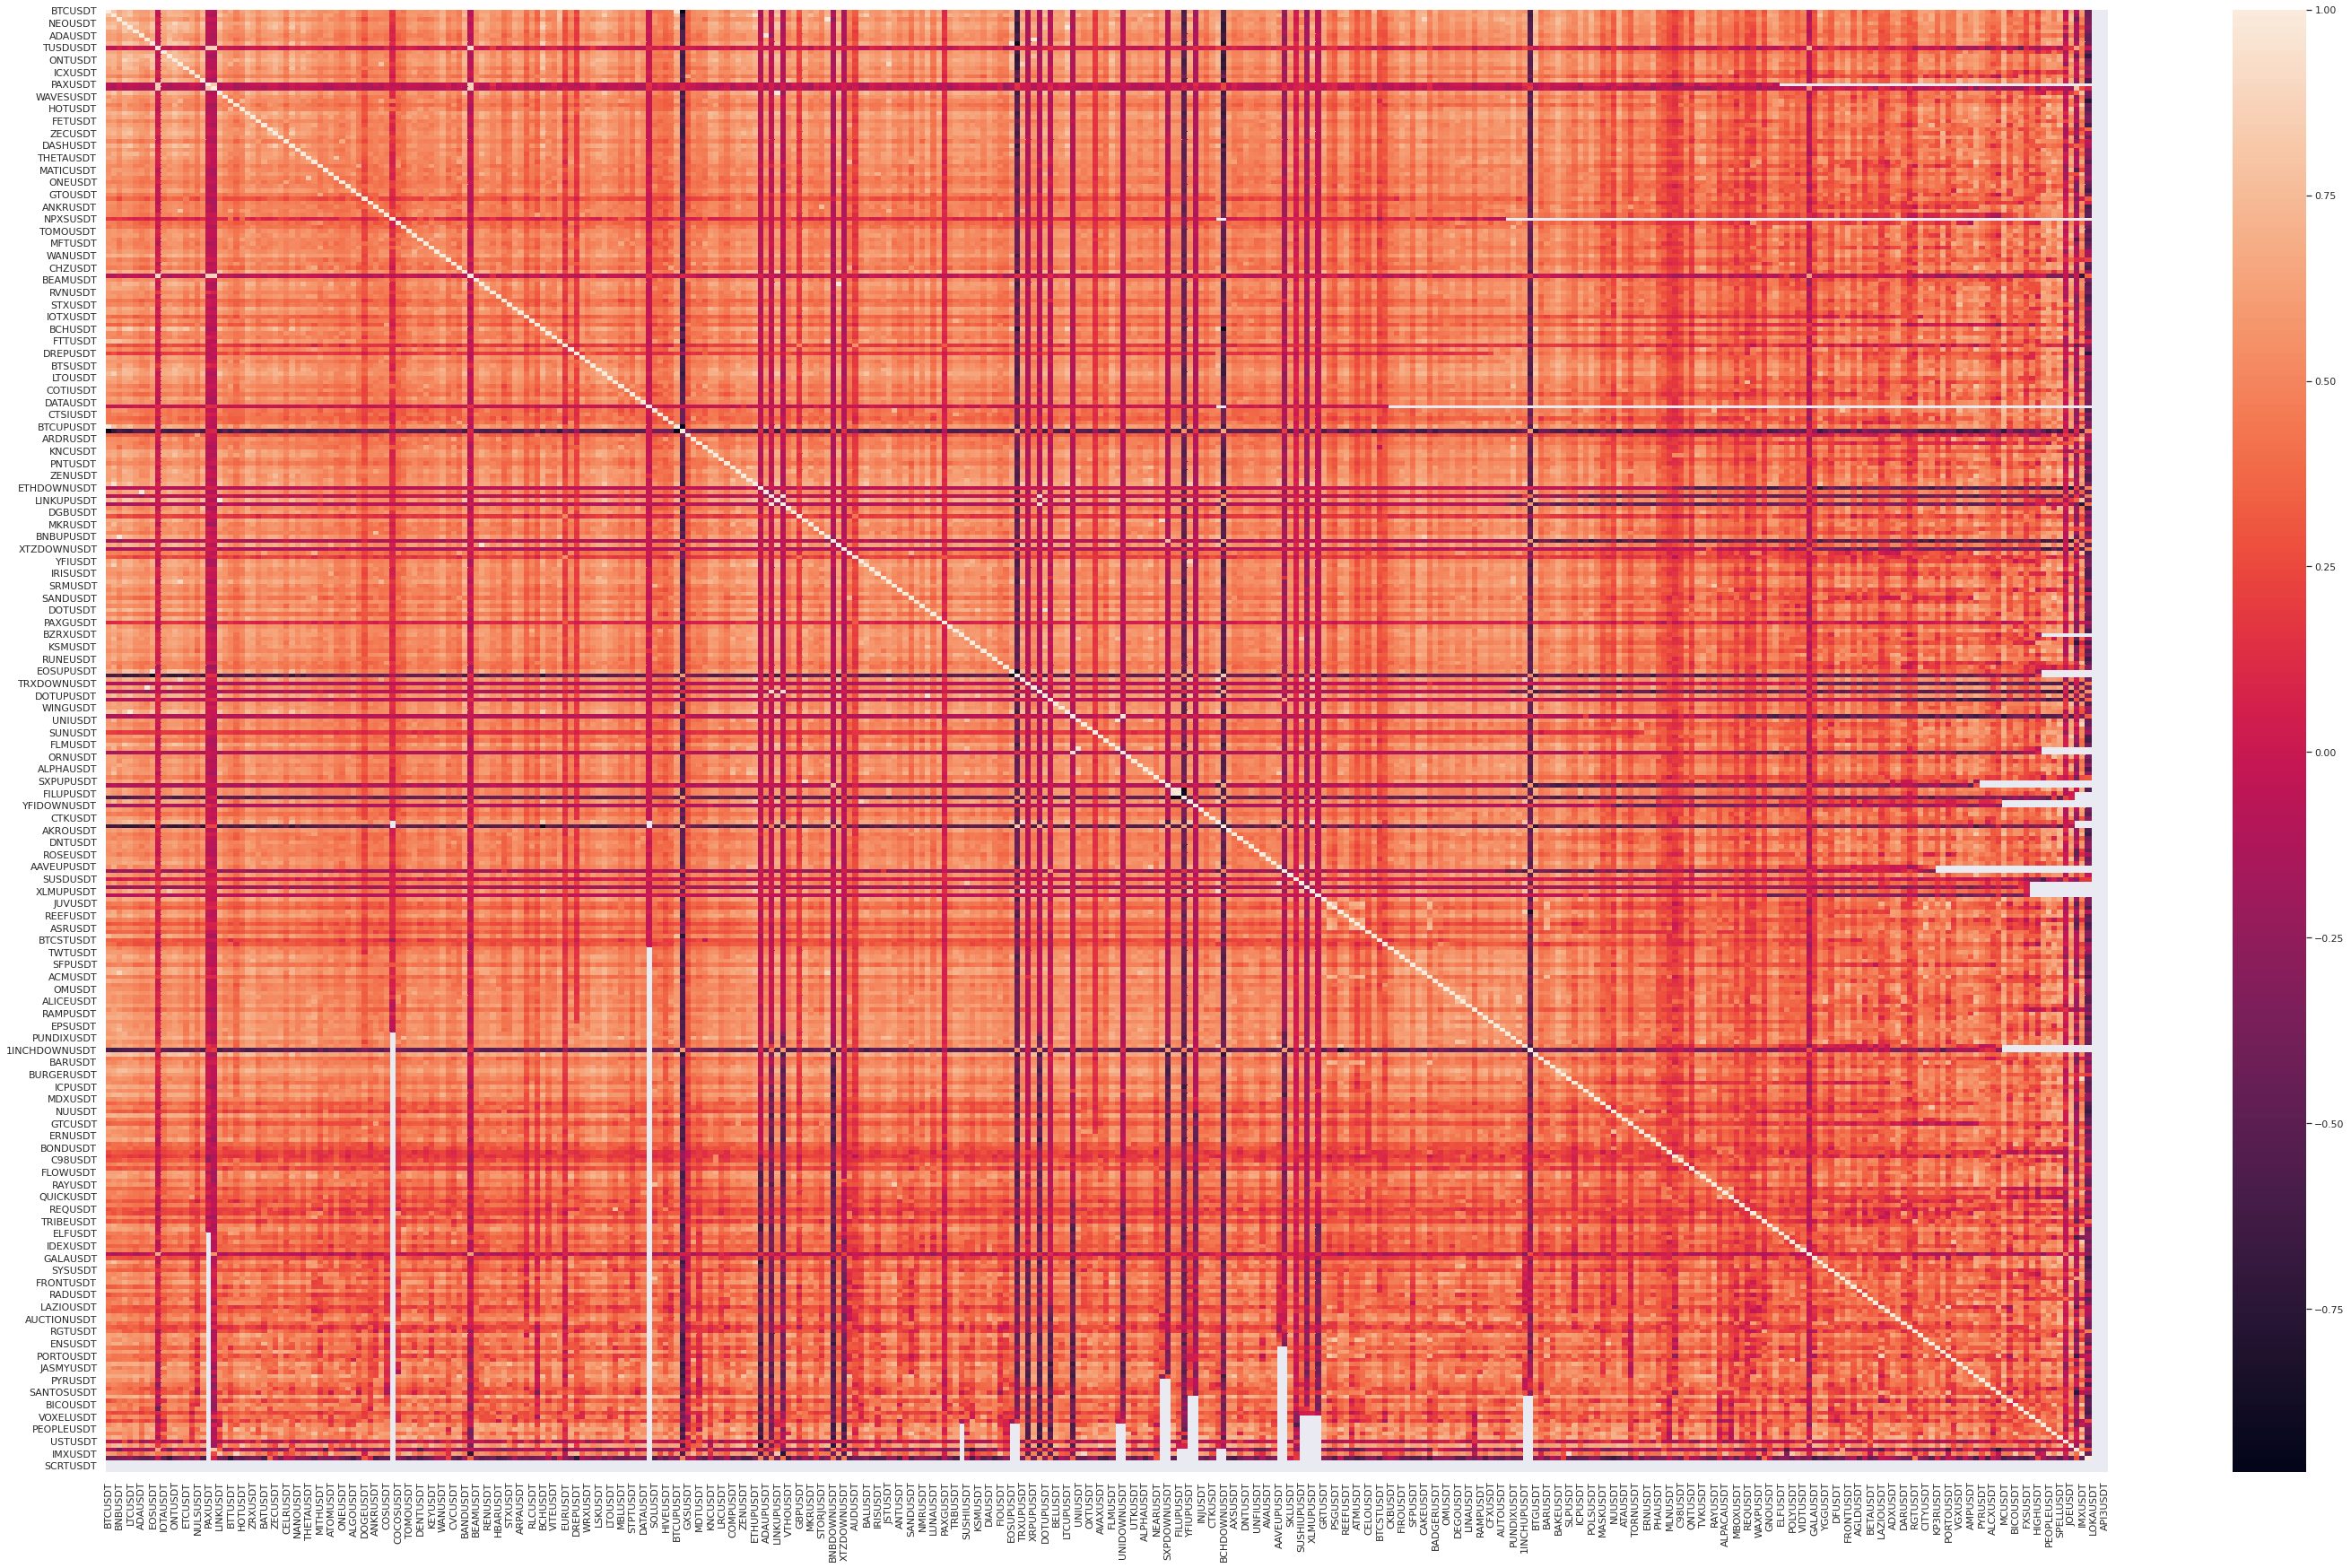

In [ ]:
sb.heatmap(logretdf.corr())

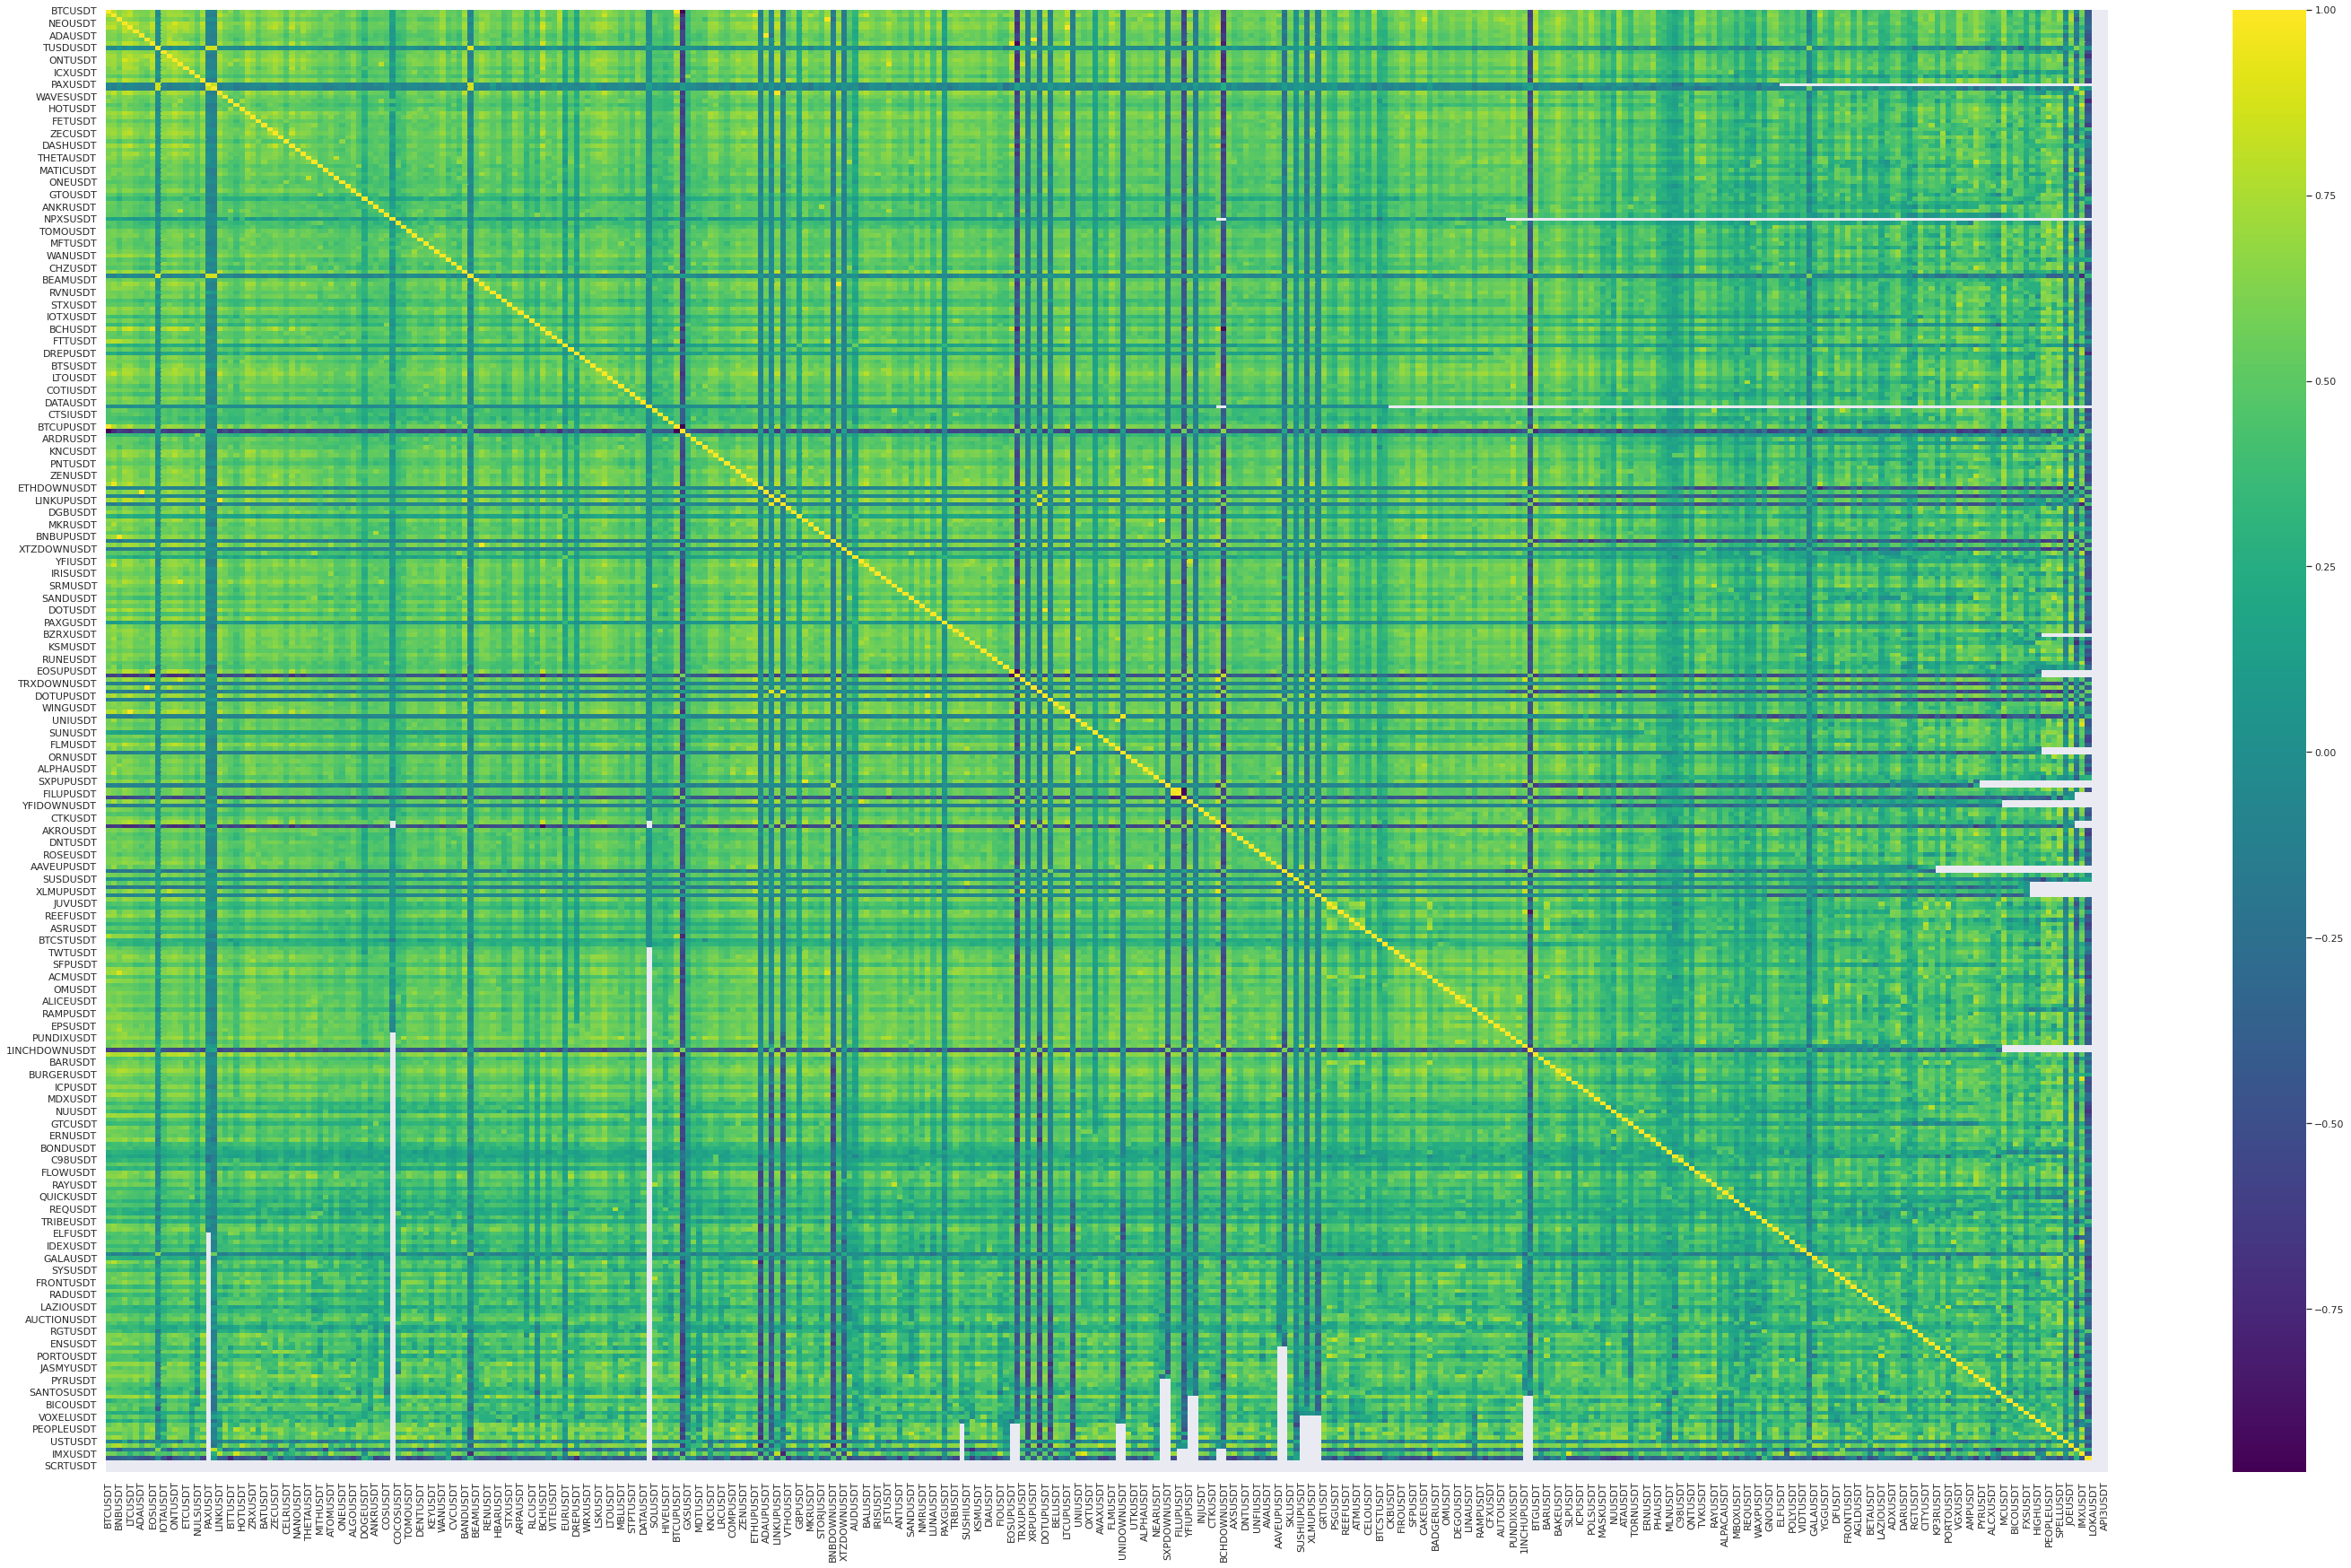

In [ ]:
sb.heatmap(logretdf.corr(), cmap='viridis')

In [ ]:
logretdf[['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'DOGEUSDT', 'SHIBUSDT']].corr()

,BTCUSDT,ETHUSDT,ADAUSDT,DOGEUSDT,SHIBUSDT
BTCUSDT,1.000000,0.794203,0.602922,0.391438,0.544810
ETHUSDT,0.794203,1.000000,0.622770,0.372156,0.508484
ADAUSDT,0.602922,0.622770,1.000000,0.331768,0.409871
DOGEUSDT,0.391438,0.372156,0.331768,1.000000,0.527330
SHIBUSDT,0.544810,0.508484,0.409871,0.527330,1.000000


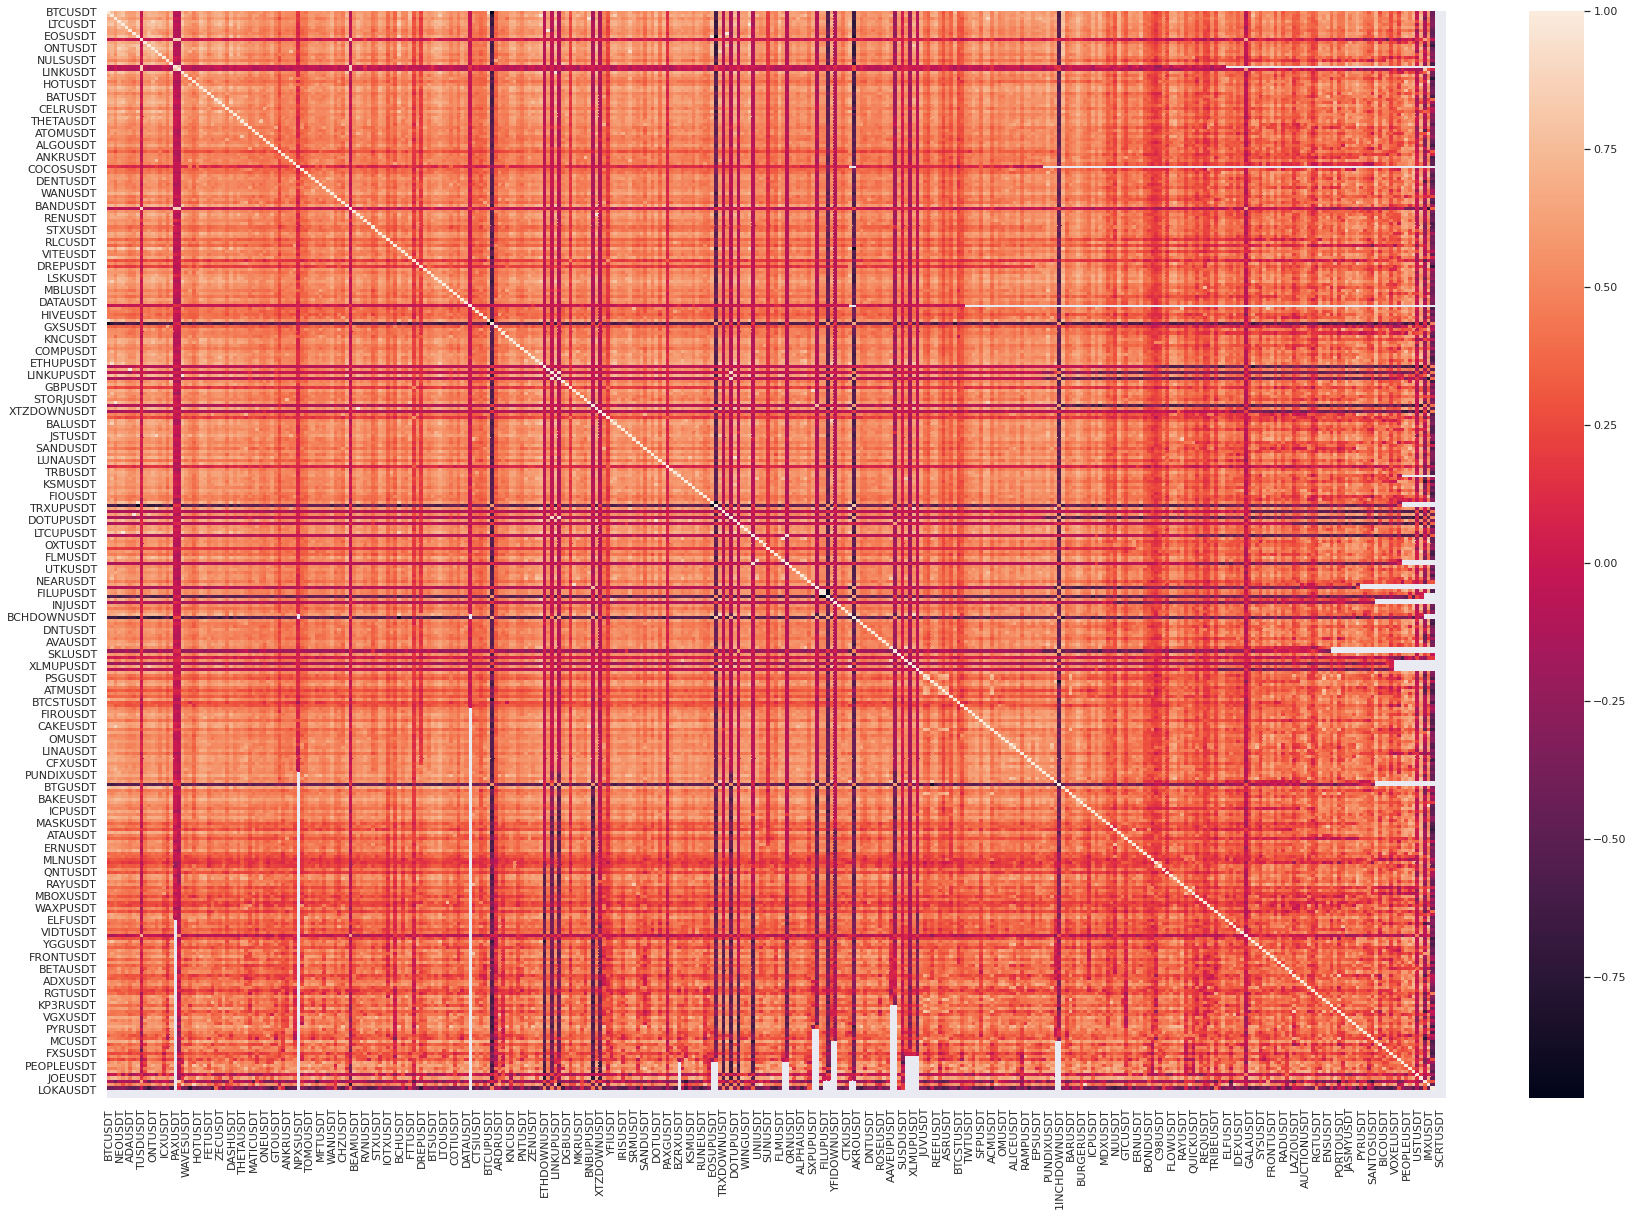

In [ ]:
sb.heatmap(logretdf.corr())

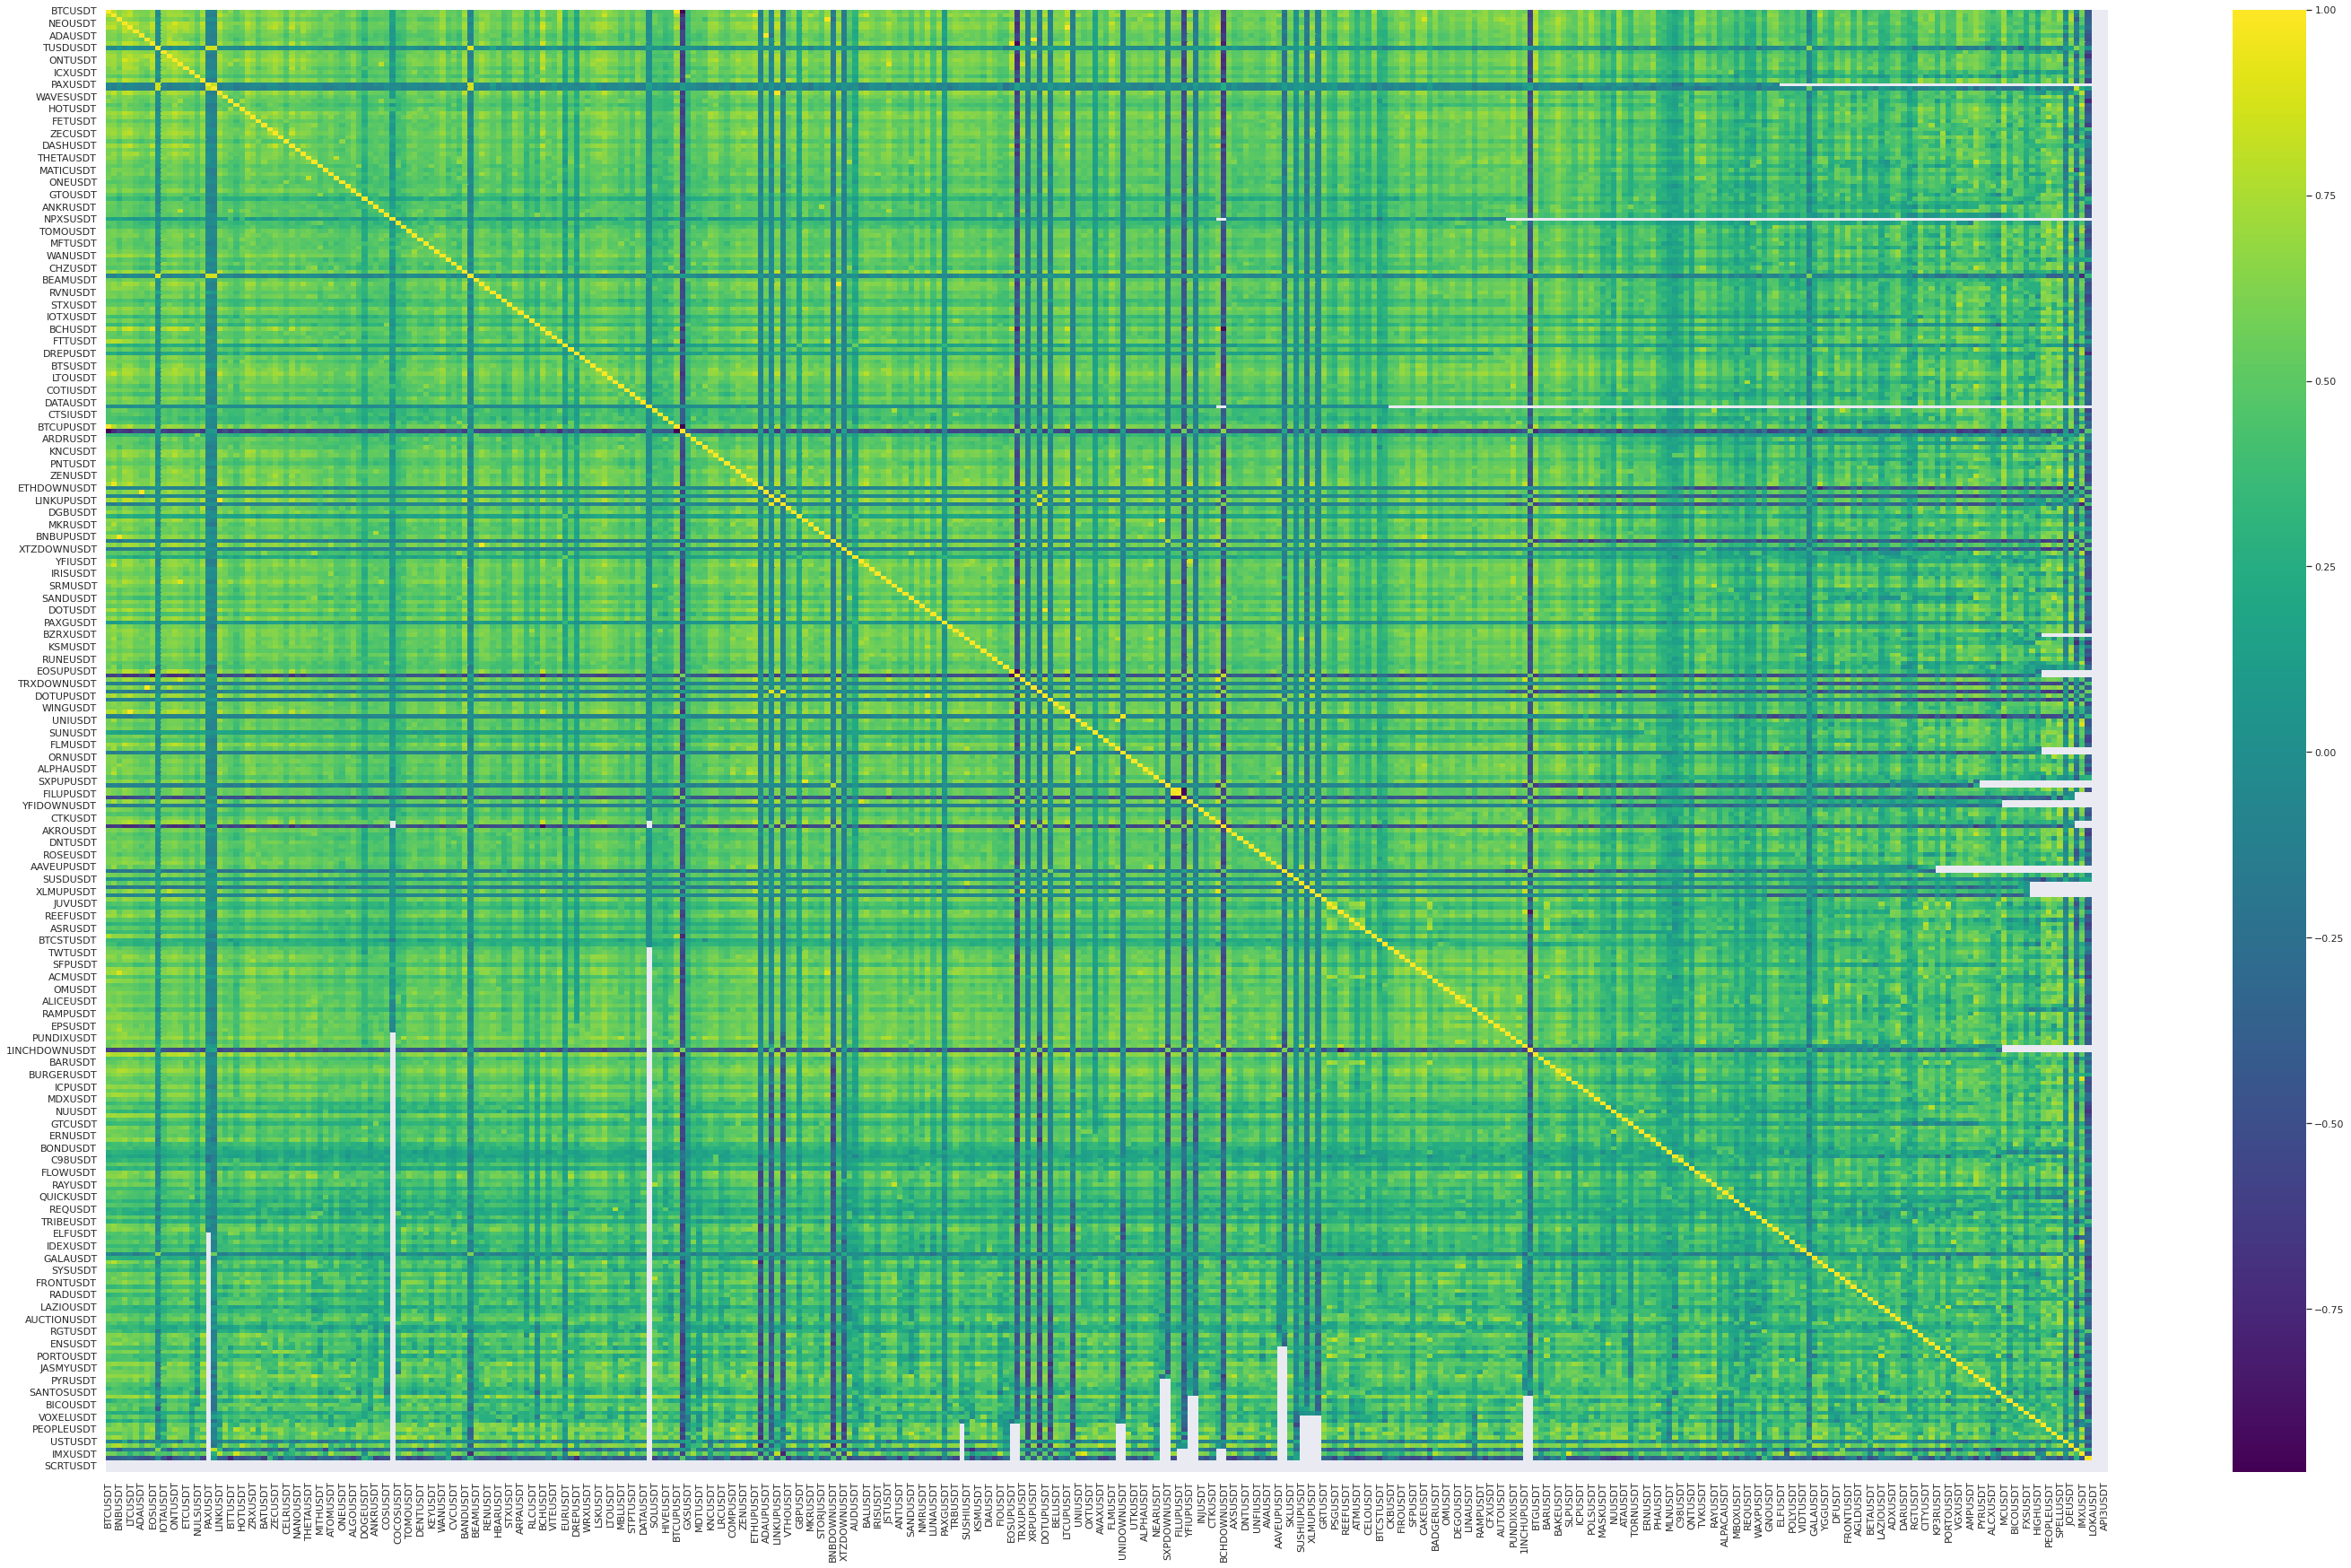

In [ ]:
sb.heatmap(logretdf.corr(), cmap='viridis')

In [ ]:
corr_df = logretdf.corr()

In [ ]:
corr_df['BTCUSDT'].nlargest(20)

BTCUSDT       1.000000
BTCUPUSDT     0.990477
BTGUSDT       0.800603
ETHUSDT       0.794203
LTCUSDT       0.786735
LTCUPUSDT     0.778378
RIFUSDT       0.767899
FTTUSDT       0.754502
BCHUSDT       0.744426
BNTUSDT       0.742815
ETHUPUSDT     0.736660
DOTUSDT       0.730500
NEOUSDT       0.730125
XLMUSDT       0.715782
LINKUPUSDT    0.714748
LINKUSDT      0.708552
XVGUSDT       0.706732
DOTUPUSDT     0.705478
CAKEUSDT      0.704503
BADGERUSDT    0.703007
Name: BTCUSDT, dtype: float64

In [ ]:
corr_df['BTCUSDT'].nsmallest(20)

BTCDOWNUSDT     -0.970147
BCHDOWNUSDT     -0.657869
EOSDOWNUSDT     -0.592144
1INCHDOWNUSDT   -0.582794
FILDOWNUSDT     -0.571136
GLMRUSDT        -0.416286
SUSHIDOWNUSDT   -0.200365
AAVEDOWNUSDT    -0.185655
BNBDOWNUSDT     -0.164591
YFIDOWNUSDT     -0.149021
DOTDOWNUSDT     -0.145734
XTZDOWNUSDT     -0.139828
LTCDOWNUSDT     -0.139214
LINKDOWNUSDT    -0.133302
XRPDOWNUSDT     -0.133257
UNIDOWNUSDT     -0.121690
SXPDOWNUSDT     -0.110746
TRXDOWNUSDT     -0.102219
ETHDOWNUSDT     -0.094220
USDCUSDT        -0.085088
Name: BTCUSDT, dtype: float64

In [ ]:
exclude = ['UP', 'DOWN', 'BEAR', 'BULL']

In [ ]:
non_lev = [symbol for symbol in relevant if all(excludes not in symbol for excludes in exclude)]

In [ ]:
stacked = corr_df.filter(non_lev, axis=1).filter(non_lev, axis=0)

In [ ]:
stacked.unstack()

BTCUSDT   BTCUSDT     1.000000
          ETHUSDT     0.794203
          BNBUSDT     0.650366
          NEOUSDT     0.730125
          LTCUSDT     0.786735
                        ...   
API3USDT  IMXUSDT          NaN
          GLMRUSDT         NaN
          LOKAUSDT         NaN
          SCRTUSDT         NaN
          API3USDT         NaN
Length: 101124, dtype: float64

In [ ]:
unstacked = stacked.unstack()

In [ ]:
unstacked[unstacked < 0.7].nlargest(20)

LINKUSDT     FIROUSDT       0.699985
FIROUSDT     LINKUSDT       0.699985
BELUSDT      BAKEUSDT       0.699963
BAKEUSDT     BELUSDT        0.699963
LTCUSDT      YFIUSDT        0.699909
YFIUSDT      LTCUSDT        0.699909
DOCKUSDT     AUCTIONUSDT    0.699850
AUCTIONUSDT  DOCKUSDT       0.699850
BTCUSDT      DODOUSDT       0.699802
DODOUSDT     BTCUSDT        0.699802
OMGUSDT      FLMUSDT        0.699754
FLMUSDT      OMGUSDT        0.699754
VITEUSDT     MCUSDT         0.699747
MCUSDT       VITEUSDT       0.699747
ETHUSDT      MCUSDT         0.699739
MCUSDT       ETHUSDT        0.699739
BTGUSDT      JOEUSDT        0.699694
JOEUSDT      BTGUSDT        0.699694
BNTUSDT      TVKUSDT        0.699657
TVKUSDT      BNTUSDT        0.699657
dtype: float64

In [ ]:
unstacked[unstacked > -0.7].nsmallest(20)

XLMUSDT    GLMRUSDT    -0.690743
GLMRUSDT   XLMUSDT     -0.690743
NUUSDT     GLMRUSDT    -0.670042
GLMRUSDT   NUUSDT      -0.670042
PORTOUSDT  ACHUSDT     -0.669234
ACHUSDT    PORTOUSDT   -0.669234
ACMUSDT    GLMRUSDT    -0.640691
GLMRUSDT   ACMUSDT     -0.640691
GALAUSDT   GLMRUSDT    -0.639412
GLMRUSDT   GALAUSDT    -0.639412
AXSUSDT    GLMRUSDT    -0.636945
GLMRUSDT   AXSUSDT     -0.636945
RUNEUSDT   GLMRUSDT    -0.630221
GLMRUSDT   RUNEUSDT    -0.630221
VTHOUSDT   GLMRUSDT    -0.627419
GLMRUSDT   VTHOUSDT    -0.627419
ALGOUSDT   GLMRUSDT    -0.622494
GLMRUSDT   ALGOUSDT    -0.622494
HNTUSDT    GLMRUSDT    -0.610755
GLMRUSDT   HNTUSDT     -0.610755
dtype: float64